# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [1]:


import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# add more imports here if you like
# ...
from datetime import datetime
import re

In [3]:
# if you use Google Colab:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# change this line your folder where the data is found
basedir = './'

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [3]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
    return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [4]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


## Question 1a

In [5]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
    """Drop unnecessary columns
    :type df: dataframe
    :rtype: dataframe
    """
    columns_need_to_be_dropped = ['scrape_id','last_scraped','description','listing_url','neighbourhood',
                       'calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url',
                       'host_url', 'host_about', 'host_location','host_total_listings_count','host_thumbnail_url',
                       'host_picture_url', 'host_verifications','bathrooms_text','has_availability',
                       'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
                       'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                       'number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                       'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
    df = df.drop(columns=columns_need_to_be_dropped)
    return df

In [6]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [7]:
columns = df.columns

In [8]:
def drop_cols_na(df, threshold=0.5):
    """Drop columns according to the amount of NaN values they contain
    :type df: dataframe
    :type threshold: float
    :rtype: dataframe
    """
    columns_need_to_be_deleted = []
    total_number = len(df)
    for column in columns:
        number_of_missing = np.sum(pd.isna(df[column]))
        if (number_of_missing / total_number) >= threshold:
            columns_need_to_be_deleted.append(column)
    df = df.drop(columns=columns_need_to_be_deleted)
    return df

In [9]:
df = drop_cols_na(df)

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [11]:
new_columns = df.columns

In [12]:
for column in columns:
    if column not in new_columns:
        print(f"{column} has too many missing values and has been dropped from the listings")

host_response_time has too many missing values and has been dropped from the listings
host_response_rate has too many missing values and has been dropped from the listings
neighbourhood_group_cleansed has too many missing values and has been dropped from the listings
bathrooms has too many missing values and has been dropped from the listings
calendar_updated has too many missing values and has been dropped from the listings
license has too many missing values and has been dropped from the listings


## Question 1b

In [13]:
def binary_encoding(df):
    """Transform binary string t and f to int 1 and 0
    :type df: dataframe
    :rtype: dataframe
    """
    for column in new_columns:
        column_with_binary_t_and_f = True
        for value in df[column].unique():
            if value not in ["t", "f", np.nan]:
                column_with_binary_t_and_f = False
                break
        if column_with_binary_t_and_f:
            int_form_binary = []
            for value in df[column]:
                if value == "t": int_form_binary.append(1)
                elif value == "f": int_form_binary.append(0)
                else: int_form_binary.append(np.nan)
            df[column] = int_form_binary
    return df

In [14]:
df = binary_encoding(df)

In [15]:
df.head()

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,...,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,...,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,...,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,...,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68


In [16]:
# hint: check Pandas to_datetime method
def add_host_days(df):
    """Add a column that represents the number of days that the host has been registered
    :type df: dataframe
    :rtype: dataframe
    """
    data = datetime.now() - pd.to_datetime(df["host_since"])
    days = []
    for day in data:
        days.append(day.days)
    df["host_days"] = days
    return df

In [17]:
df = add_host_days(df)
df.head()

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95,4620.0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4186.0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14,4198.0
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01,4075.0
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68,4024.0


In [18]:
df["price"].head()

0     $59.00
1    $236.00
2    $125.00
3    $135.00
4     $75.00
Name: price, dtype: object

In [19]:
def convert_price(df):
    """ Convert the prices into floating point numbers
    :type df: dataframe
    :rtype: dataframe
    """
    data = df["price"]
    prices = []
    for price in data:
        preprocessed_string_price = re.sub(r'[,$]', '', price)
        prices.append(float(preprocessed_string_price))
    df["price"] = prices
    return df

In [20]:
df = convert_price(df)
df["price"].head()

0     59.0
1    236.0
2    125.0
3    135.0
4     75.0
Name: price, dtype: float64

## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [21]:
# How many hosts offer 2 or more properties for rent?
sum(df["host_listings_count"] >= 2)

4172

In [22]:
# What is the highest price for a listing?
max(df["price"])

8000.0

In [23]:
# What is the ID of the listing that has the largest number of bedrooms?
df["id"][np.argmax(df["bedrooms"])]

46015289

In [24]:
# What is the ID of the listing with the largest advertised price
df["id"][np.argmax(df["price"])]

258273

In [25]:
# There are different room types. How many listings are there for the most common room type?
df["room_type"].value_counts()[0]

14433

In [26]:
# How many hosts are there that have been registered for more than 3000 days?
sum(df["host_days"] > 3000)

2691

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

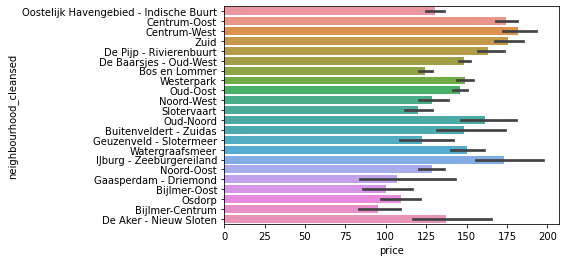

In [29]:
barplot_on_price_and_neighbourhood = sns.barplot(x="price", y="neighbourhood_cleansed", data=df)

Plot a correlation matrix as instructed in the Coursework proforma:

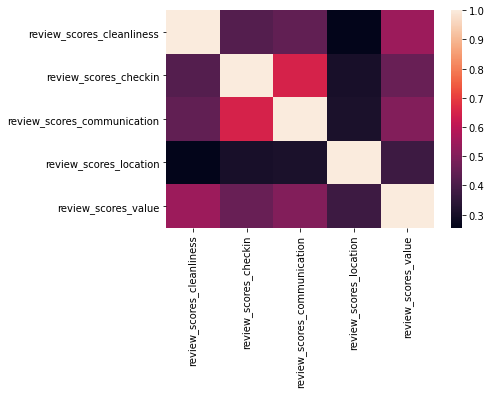

In [30]:
ratings = ["review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
           "review_scores_location", "review_scores_value"]
ratings_correlation_heatmap = sns.heatmap(df[ratings].corr())

Plot a geographical distribution as instructed in the Coursework proforma:

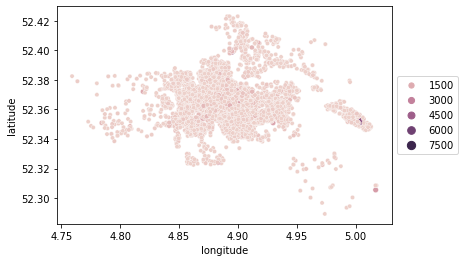

In [31]:
geographical_distribution = sns.scatterplot(data=df[df.price>150], x="longitude", y="latitude",
                                            hue="price", size="price")
geographical_distribution.legend(loc='center left', bbox_to_anchor=(1, 0.5))

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [32]:
predictors = ["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin",
              "review_scores_communication", "review_scores_location", "review_scores_value"]
target = "review_scores_rating"
combine = predictors + [target]
print(len(df[combine].dropna()))

15880


In [33]:
X = df[predictors]
X = sm.add_constant(X)
y = df[target]
# Fit and summarize OLS model
# I choose drop between imputation and drop because I think the sample is large enough even after dropping (15880)
mod = sm.OLS(y, X, missing="drop")

mod_after_fit = mod.fit()

summary = mod_after_fit.summary(xname=["Intercept", "accuracy", "cleanliness", "checkin", "communication", "location", "value"])

In [34]:
print(summary)

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.726
Model:                              OLS   Adj. R-squared:                  0.726
Method:                   Least Squares   F-statistic:                     7008.
Date:                  Sat, 15 May 2021   Prob (F-statistic):               0.00
Time:                          22:36:38   Log-Likelihood:                -42957.
No. Observations:                 15880   AIC:                         8.593e+04
Df Residuals:                     15873   BIC:                         8.598e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3169  

**T-test questions**:

Which room types are significantly different in terms of nightly price?

if $\alpha=0.01$, we can conlude that **(private room and entire home/apt),
(private room and hotel room), (entire home/apt and hotel room), and
(entire home/apt and shared room)** are significantly different in terms of 
nightly price.

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

if $\alpha=0.001667$ (after bonferroni correction), we can conlude that **(private room and entire home/apt)
and (private room and hotel room)** are significantly different in terms of 
nightly price.


In [35]:
alpha = 0.01
# Divided by 6 because we will have 6 independent tests
alpha_after_bonferroni_correction = 0.01 / 6
print(f"alpha:{alpha}; alpha after bonferroni correction:{alpha_after_bonferroni_correction}")

alpha:0.01; alpha after bonferroni correction:0.0016666666666666668


In [36]:
room_types = df["room_type"].unique()
room_types

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [37]:
pvalues = []
for room_type1 in room_types:
    for room_type2 in room_types:
        pvalues.append(
            round(
                scipy.stats.ttest_ind(df[df["room_type"]==room_type1]["price"],
                df[df["room_type"]==room_type2]["price"]).pvalue
                ,3)
        )
pvalues = np.reshape(pvalues, (4,4))    

In [38]:
pvalues_df = pd.DataFrame(pvalues, 
                  index=room_types, 
                  columns=room_types)
pvalues_df

,Private room,Entire home/apt,Hotel room,Shared room
Private room,1.000,0.000,0.000,0.452
Entire home/apt,0.000,1.000,0.003,0.002
Hotel room,0.000,0.003,1.000,0.312
Shared room,0.452,0.002,0.312,1.000


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

- Based on **correlation values** with price, The predictors whose correlation values **greater than 0.05** will be selected; 
- And also based on **correlation graphs**, The variables having **non-linearity relationship with price**, which could cause a low correlation value, will be selected.
- Therefore, the selected variables are **"accommodates", "bedrooms", "beds", "availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", "review_scores_location", "reviews_per_month", "room_type_Entire home/apt", "room_type_Private room", "latitude", "longitude", and "host_days"**

In [39]:
df_room_type_dummies = pd.get_dummies(df, columns=["room_type"])

In [40]:
# Only accept predictors whose correlation > 0.05
threshold = 0.05
corr_result = df_room_type_dummies.corr()["price"]
corr_result[abs(corr_result)>threshold].sort_values()

room_type_Private room      -0.208645
reviews_per_month           -0.106022
number_of_reviews           -0.083182
number_of_reviews_ltm       -0.079468
availability_60              0.058596
availability_90              0.058762
availability_30              0.060284
availability_365             0.066920
review_scores_location       0.072974
room_type_Entire home/apt    0.209981
beds                         0.267632
bedrooms                     0.275594
accommodates                 0.333546
price                        1.000000
Name: price, dtype: float64

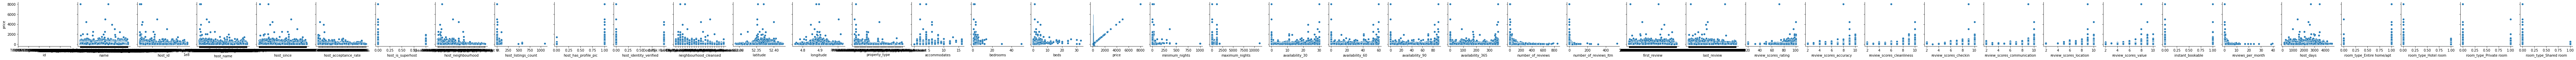

In [41]:
import warnings
warnings.filterwarnings("ignore") 
price_and_others_correlation = sns.pairplot(data=df_room_type_dummies,
                  y_vars=["price"],
                  x_vars=df_room_type_dummies.columns)

In [42]:
# Observe the correlation graph, we can find non-linearity patterns, 
# which might cause the correlations with price close to 0.
corr_result[["latitude", "longitude", "host_days"]]

latitude    -0.001789
longitude    0.012194
host_days    0.037237
Name: price, dtype: float64

In [43]:
price_predictors = ["accommodates", "bedrooms", "beds", "availability_30", "availability_60", 
                      "availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", 
                      "review_scores_location", "reviews_per_month", "room_type_Entire home/apt", 
                      "room_type_Private room", "latitude", "longitude", "host_days"]

In [44]:
def get_model(df, predictors, target):
    """ Get model
    :type df: dataframe --  the listings dataframe
    :type predictors: list -- selected predictors
    :type target: str -- target
    :rtype: model 
    """
    X = df[predictors]
    X = sm.add_constant(X)
    y = df[target]
    mod = sm.OLS(y, X, missing="drop")
    mod_after_fit = mod.fit()
    return mod_after_fit
def get_rsquared_adj(df, predictors, target):
    """ Get adjusted R2 value of predictors => model
    :type df: dataframe --  the listings dataframe
    :type predictors: list -- selected predictors
    :type target: str -- target
    :rtype: float: -- adjusted R2 value
    """
    mod_after_fit = get_model(df, predictors, target)
    return mod_after_fit.rsquared_adj
def get_max_pvalue_and_its_name(df, predictors, target):
    """ Get max pvalue and its name
    :type df: dataframe --  the listings dataframe
    :type predictors: list -- selected predictors
    :type target: str -- target
    :rtype: tuple -- (pvalue, name)
    """
    mod_after_fit = get_model(df, predictors, target)
    max_pvalue = 0
    length = len(mod_after_fit.pvalues)
    # 0 is ignored, because it is an intercept
    for i in range(1, length):   
        pvalue = mod_after_fit.pvalues[i]
        name = mod_after_fit.pvalues.index[i]
        if pvalue >= max_pvalue:
            max_pvalue = pvalue
            max_name = name
    return max_pvalue, max_name

In [45]:
def variable_selection(df, predictors, target, alpha):
    """ Help select only significant variables
    :type df: dataframe --  the listings dataframe
    :type predictors: list -- initial selected predictors
    :type target: str -- target
    :type alpha: float -- significance level for selecting significant predictors 
    :rtype: list -- reduced predictors
    """
    # stage 1 -- build a model by adding variables one after the other
    reduced_predictors = []
    R2 = 0
    delta = 1 # 1 is no meaning, just for making "while loop" run
    while (delta > 0):
        new_R2 = 0
        good_predictor = None
        for predictor in predictors:
            if predictor not in reduced_predictors:
                combined_predictors = [predictor] + reduced_predictors
                rsquared_adj = get_rsquared_adj(df, combined_predictors, target)
                if rsquared_adj > new_R2:
                    new_R2 = rsquared_adj
                    good_predictor = predictor
        if new_R2 > R2:
            reduced_predictors.append(good_predictor)
        delta = new_R2 - R2 # delta > 0 means new model has greater adjusted R2 value
        R2 = new_R2
    # stage 2 -- keep removing variables until all variables in the model are significant
    pvalue = 1 # 1 is just for making the "while loop" run
    while pvalue > alpha:
        pvalue, name = get_max_pvalue_and_its_name(df, reduced_predictors, target)
        if pvalue > alpha:
            reduced_predictors.remove(name)
    # Stage 1 and 2 both done
    return reduced_predictors

In [46]:
reduced_predictors = variable_selection(df_room_type_dummies, price_predictors, "price", 0.05)
reduced_predictors

['accommodates',
 'review_scores_location',
 'room_type_Private room',
 'availability_365',
 'number_of_reviews_ltm',
 'bedrooms',
 'availability_30',
 'latitude',
 'room_type_Entire home/apt',
 'number_of_reviews']

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [27]:
np.max(df[["neighbourhood_cleansed","price"]])

neighbourhood_cleansed    Zuid
price                     8000
dtype: object

In [48]:
def recommend_neighbourhood_on_absolute_properties(df, condition):
    """ Recommend a neighbourhood given a budget
    :type df: dataframe --  the listings dataframe
    :type condition: series<bool> -- for filtering rows which are not fitting into the condition
    :rtype: str -- name of the neighbourhood providing absolute max properties
    """
    value_counts = df["neighbourhood_cleansed"][condition].value_counts().sort_values()
    recommend_neighbourhood = value_counts.index[-1]
    return recommend_neighbourhood
def recommend_neighbourhood_on_relative_properties(df, condition):
    """ Recommend a neighbourhood given a budget
    :type df: dataframe --  the listings dataframe
    :type condition: series<bool> -- for filtering rows which are not fitting into the condition
    :rtype: str -- name of the neighbourhood providing relative max properties
    """
    total_value_counts = df["neighbourhood_cleansed"].value_counts().sort_index()
    value_counts = df["neighbourhood_cleansed"][condition].value_counts().sort_index()
    relative_value_counts = (value_counts / total_value_counts).sort_values()
    recommend_neighbourhood = relative_value_counts.index[-1]
    return recommend_neighbourhood

In [49]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):
    """ Recommend a neighbourhood given a budget
    :type df: dataframe --  the listings dataframe
    :type budget_min: float -- minimum budget
    :type budget_max: float -- maximum budget
    :type relative: bool -- True compare relative numbers and False compare absolute property numbers
    :rtype: str -- name of the neighbourhood providing either relative max or absolute max properties
    """
    condition = (df["price"]>=budget_min) & (df["price"]<=budget_max)
    if sum(condition) == 0: 
        return "Sorry, No neighbourhood satisfies your budgets plan yet"
    if not relative: return recommend_neighbourhood_on_absolute_properties(df, condition)
    return recommend_neighbourhood_on_relative_properties(df, condition)

In [50]:
recommend_neighbourhood(df, 100, 300, False)

'De Baarsjes - Oud-West'

In [51]:
recommend_neighbourhood(df, 100, 300, True)

'Oud-Oost'

In [52]:
recommend_neighbourhood(df, 100000, 3000000, True)

'Sorry, No neighbourhood satisfies your budgets plan yet'

### Price recommender for hosts

In [28]:
def get_euclidean_distance(df, latitude, longitude):
    """ Recommend a nightly price for a host
    :type df: dataframe -- the listings dataframe
    :type latitude: float -- geolocation 
    :type longitude: float -- geolocation 
    :rtype: dataframe -- dataframe with columns price and euclidean_distance
    """
    left = (df["latitude"] - latitude)**2
    right = (df["longitude"] - longitude)**2
    euclidean_distance = np.sqrt(left + right)
    price = df["price"]
    result =  pd.DataFrame({
        "price": price,
        "euclidean_distance": euclidean_distance
    })
    result = result[(result["price"] > 0) & (result["euclidean_distance"].isna() == False)]
    return result

In [45]:
def recommend_price(df, latitude, longitude, n_neighbours=7, room_type=None):
    """ Recommend a nightly price for a host
    :type df: dataframe -- the listings dataframe
    :type latitude: float -- geolocation 
    :type longitude: float -- geolocation 
    :type n_neighbours: int -- the number of closeby properties
    :type room_type: str -- room type
    :rtype: float -- a nightly price for the host
    """
    if room_type:
        df = df[df["room_type"] == room_type]
    price_and_euclidean_distance_df = get_euclidean_distance(df, latitude, longitude)
    price_and_euclidean_distance_df = price_and_euclidean_distance_df.sort_values(by="euclidean_distance")
    prices = price_and_euclidean_distance_df["price"].to_numpy()
    price = np.mean(prices[:n_neighbours])
    return price

In [30]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [31]:
recommend_price(df, 150, 49, 50, room_type="Private room")

66.98

In [32]:
recommend_price(df, 150, 49, 50, room_type="Entire home/apt")

145.28

In [33]:
recommend_price(df, 150, 49, 50, room_type="Hotel room")

159.02

In [34]:
recommend_price(df, 150, 49, 50, room_type="Shared room")

104.6

In [35]:
recommend_price(df, 150, 49, 50)

107.74